

First, import packages visualize the model grid here:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import netCDF4 as nc4

## Reading the grid

The grid for this model is located on the north slope of Alaska covering approximately 155-143$^{\circ}$W in longitude and 70-73$^{\circ}$N in latitude. The grid spacing will be 500 m and the grid will span 511 rows and 840 columns. 

This grid is stored in a netCDF file which we can read in as follows:

In [2]:
# read in the model longitude and latitude
ds = nc4.Dataset('../../../data/alaskan_north_slope/NorthSlope_ncgrid.nc')
XC = ds.variables['XC'][:, :]
YC = ds.variables['YC'][:, :]
dXC = ds.variables['dxC'][:, :]
dYC = ds.variables['dyC'][:, :]
ds.close()

### Visualizing the Grid
The grids above can be visualized as follows:

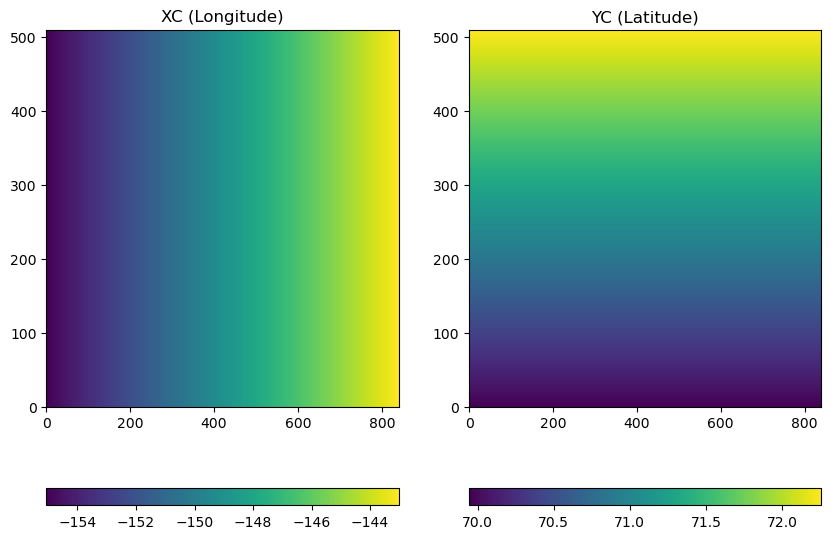

In [3]:
# make a plot of XC and YC
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
C = plt.pcolormesh(XC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('XC (Longitude)')

plt.subplot(1,2,2)
C = plt.pcolormesh(YC)
plt.colorbar(C, orientation = 'horizontal')
plt.title('YC (Latitude)')

plt.show()

### Visualizing the Grid on a Map with Cartopy
To get a sense of where the model is located on the globe, cartopy can be be used to plot the domain on the globe:

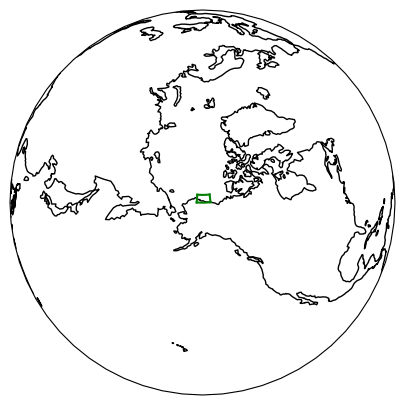

In [4]:
plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.Orthographic(-150,70))
ax.plot(XC[:,0], YC[:,0], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[:,-1], YC[:,-1], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[0,:], YC[0,:], 'g-', transform=ccrs.PlateCarree())
ax.plot(XC[-1,:], YC[-1,:], 'g-', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
plt.show()

### Visualizing the Grid Spacing
Here, we will visualize the grid spacing to ensure the dimensions match expectations:

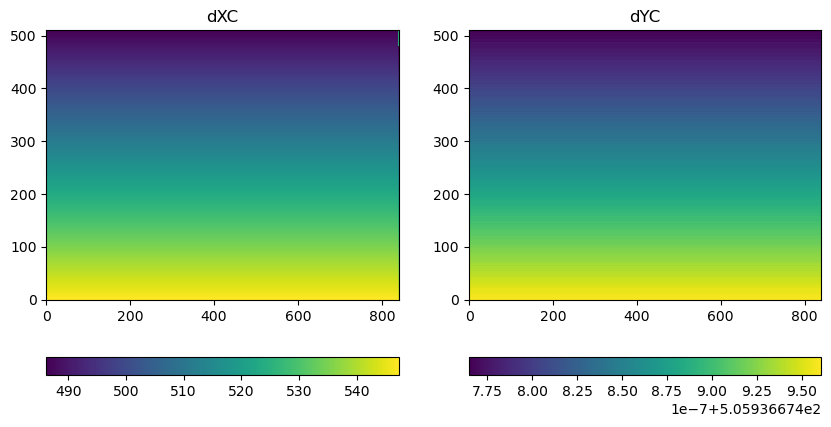

In [5]:
# make a plot of XC and YC
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(dXC[:,1:])
plt.colorbar(C, orientation = 'horizontal')
plt.title('dXC')

plt.subplot(1,2,2)
C = plt.pcolormesh(dYC[1:,:])
plt.colorbar(C, orientation = 'horizontal')
plt.title('dYC')

plt.show()

As we can see the grid has a resolution of about 500 m, although there is a north-south gradient in horizontal distances (in other words, points further north are closer together). 